<a href="https://colab.research.google.com/github/Larr014/DataMining/blob/master/Ejemplo_Red_neuronal_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df =df.drop(['PassengerId','Name','SibSp','Parch',"Ticket","Fare","Cabin","Embarked"],axis=1)
df

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0
...,...,...,...,...
886,0,2,male,27.0
887,1,1,female,19.0
888,0,3,female,NaN
889,1,1,male,26.0


In [4]:
df['Sex']  = [1 if x=="female" else 0 for x in df['Sex']]
df['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [5]:
df = df.dropna()
df

,Survived,Pclass,Sex,Age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0
...,...,...,...,...
885,0,3,1,39.0
886,0,2,0,27.0
887,1,1,1,19.0
889,1,1,0,26.0


In [6]:
X = df.copy()
X = X.drop(['Survived'], axis=1)
X

,Pclass,Sex,Age
0,3,0,22.0
1,1,1,38.0
2,3,1,26.0
3,1,1,35.0
4,3,0,35.0
...,...,...,...
885,3,1,39.0
886,2,0,27.0
887,1,1,19.0
889,1,0,26.0


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['Survived'],
                                                    test_size=0.2, random_state=6#42
                                                    )

In [8]:
X_train

,Pclass,Sex,Age
512,1,0,36.0
844,3,0,17.0
392,3,0,28.0
263,1,0,40.0
68,3,1,17.0
...,...,...,...
418,2,0,30.0
455,3,0,29.0
775,3,0,18.0
282,3,0,16.0


In [9]:
X_test

,Pclass,Sex,Age
244,3,0,30.0
331,1,0,45.5
520,1,1,30.0
395,3,0,22.0
554,3,1,22.0
...,...,...,...
13,3,0,39.0
662,1,0,47.0
765,1,1,51.0
243,3,0,22.0


In [10]:
y_train

512    1
844    0
392    0
263    0
68     1
      ..
418    0
455    1
775    0
282    0
890    0
Name: Survived, Length: 571, dtype: int64

In [11]:
y_test

244    0
331    0
520    1
395    0
554    1
      ..
13     0
662    0
765    1
243    0
549    1
Name: Survived, Length: 143, dtype: int64

Se implementa el algoritmo

Red Neuronal


In [16]:
np.array(X_train)

array([[ 1.,  0., 36.],
       [ 3.,  0., 17.],
       [ 3.,  0., 28.],
       ...,
       [ 3.,  0., 18.],
       [ 3.,  0., 16.],
       [ 3.,  0., 32.]])

In [18]:
y_train

512    1
844    0
392    0
263    0
68     1
      ..
418    0
455    1
775    0
282    0
890    0
Name: Survived, Length: 571, dtype: int64

In [42]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense

# cargamos las 4 combinaciones de las compuertas XOR
training_data = np.array(X_train, "float32")

# y estos son los resultados que se obtienen, en el mismo orden
target_data = np.array(y_train, "float32")

model = Sequential()
model.add(Dense(16, input_dim=3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])

model.fit(training_data, target_data, epochs=100)

# evaluamos el modelo
#y_pred = model.evaluate(training_data, target_data)
y_pred1 =  model.predict(X_test)


Epoch 1/100
18/18 [==============================] - 1s 3ms/step - loss: 0.3831 - binary_accuracy: 0.5989
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 0.3781 - binary_accuracy: 0.5989
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 0.3694 - binary_accuracy: 0.6025
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 0.3097 - binary_accuracy: 0.6007
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 0.2633 - binary_accuracy: 0.5219
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2528 - binary_accuracy: 0.5587
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 0.2437 - binary_accuracy: 0.6025
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2370 - binary_accuracy: 0.6200
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2311 - binary_accuracy: 0.6182
Epoch 10/100
18/18 [==========================

In [43]:
y_pred1

array([[0.11975554],
       [0.40577856],
       [0.879152  ],
       [0.1270547 ],
       [0.57635987],
       [0.87085015],
       [0.1188691 ],
       [0.12893808],
       [0.11197986],
       [0.75570285],
       [0.12335882],
       [0.11711322],
       [0.52842116],
       [0.57635987],
       [0.25500497],
       [0.871796  ],
       [0.11114351],
       [0.11624375],
       [0.7618791 ],
       [0.42524007],
       [0.14176494],
       [0.52842116],
       [0.7282655 ],
       [0.13084492],
       [0.2534057 ],
       [0.86004865],
       [0.4501514 ],
       [0.11452157],
       [0.12893808],
       [0.45642328],
       [0.36876535],
       [0.8852871 ],
       [0.572235  ],
       [0.10230108],
       [0.231717  ],
       [0.36680356],
       [0.09195253],
       [0.13084492],
       [0.5221103 ],
       [0.12799346],
       [0.3727013 ],
       [0.46480715],
       [0.13277578],
       [0.41906637],
       [0.49048954],
       [0.11798833],
       [0.42524007],
       [0.557

In [44]:
y_pred = np.array([np.round(x) for x in y_pred])
y_pred

array([[0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],

acc: 0.8041958041958042
precision: 0.8150793650793651
recall: 0.780367231638418
f1: 0.8041958041958042


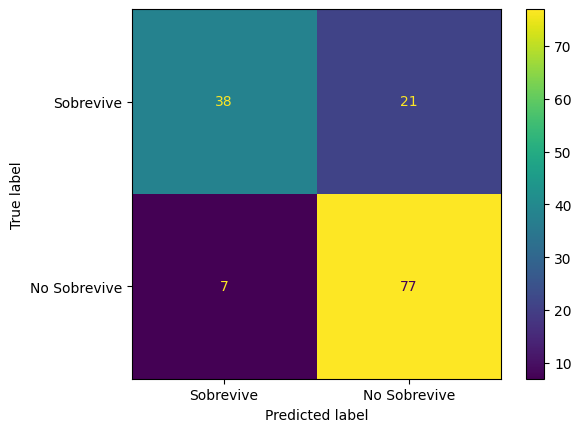

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
confusion = multilabel_confusion_matrix(y_test,y_pred)
print(f"acc: {accuracy_score(y_test,y_pred)}")
print(f"precision: {precision_score(y_test,y_pred,average='macro')}")
print(f"recall: {recall_score(y_test,y_pred,average='macro')}")
print(f"f1: {f1_score(y_test,y_pred,average='micro')}")
confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['Sobrevive','No Sobrevive']).plot(values_format='d')
